# 移動平均フィルタと一次遅れ系ローパスフィルタ
(c) 2020 @RR_Inyo

In [51]:
# 準備
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

移動平均フィルタの伝達関数$G(s)$は，ウィンドウを$T$とすると次式で表現できる。
$$
G(s) = \frac{1 - e^{- s T}}{s T}
$$
これに対して，一次遅れ系のローパスフィルタ(LPF)の伝達関数$H(s)$は時定数を$T$とすると次式で表現できる。
$$
H(s) = \frac{1}{1 + s T}
$$
以下で，周波数伝達関数$G(j \omega)$，$H(j \omega)$を計算するクラスを実装する。

In [52]:
# 移動平均フィルタクラス
class maf:
    def __init__(self, T = 10e-3):
        self.T = T
    
    def freqresp(self, omega):
        return (1 - np.exp(- 1j * omega * self.T)) / (1j * omega * self.T)

In [53]:
# 一次遅れLPF
class folpf:
    def __init__(self, T = 10e-3):
        self.T = T
    
    def freqresp(self, omega):
        return 1 / (1 + 1j * omega * self.T)

In [66]:
# インスタンス生成
T = 1e-3
G = maf(T)
H = folpf(T)

# 周波数応答計算
omega = np.logspace(1, 6, 5000)
resp_G = G.freqresp(omega)
resp_H = H.freqresp(omega)

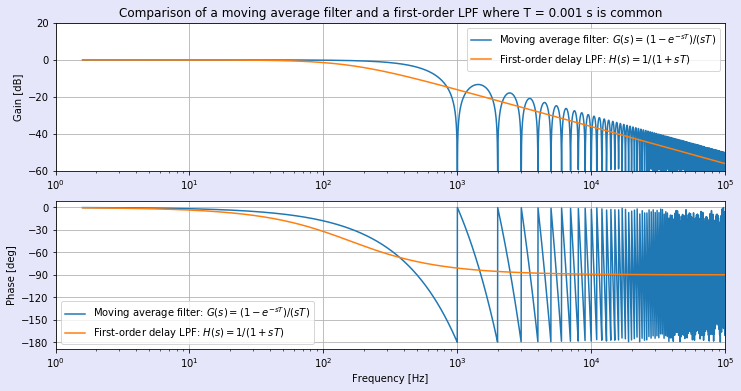

In [68]:
# ボード線図
fig, ax = plt.subplots(2, figsize = (12, 6))
fig.patch.set_facecolor('lavender')

ax[0].set_title(f'Comparison of a moving average filter and a first-order LPF where T = {T} s is common')
ax[0].semilogx(omega / 2 / np.pi, 20 * np.log10(np.abs(resp_G)), label = r'Moving average filter: $G(s) = (1 - e^{-s T}) / (s T)$')
ax[0].semilogx(omega / 2 / np.pi, 20 * np.log10(np.abs(resp_H)), label = r'First-order delay LPF: $H(s) = 1 / (1 + s T)$')
ax[0].legend()
ax[0].set_xlim(1, 1e5)
ax[0].set_ylabel('Gain [dB]')
ax[0].set_ylim(-60, 20)
ax[0].grid()


ax[1].semilogx(omega / 2 / np.pi, 180 * np.angle(resp_G) / np.pi, label = r'Moving average filter: $G(s) = (1 - e^{-s T}) / (s T)$')
ax[1].semilogx(omega / 2 / np.pi, 180 * np.angle(resp_H) / np.pi, label = r'First-order delay LPF: $H(s) = 1 / (1 + s T)$')
ax[1].legend()
ax[1].set_xlim(1, 1e5)
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_yticks(range(-180, 30, 30))
ax[1].grid()

$G(j \omega)$と$H(j \omega)$を比較する。角周波数$\omega$が十分大きければ$H(j\omega)$の分母$1 + j \omega T \simeq j \omega T$となって$G(j \omega)$の分母と等しくなる。したがって高周波域では$-20$ dB/decで減衰していく。
一方で，$G(j \omega)$の分子は$1 - e^{- j \omega T}$であり，
角周波数$\omega$によってその絶対値$|1 - e^{- j \omega T}|$は0と2の間を行き来する。したがって，高周波域では$G(j \omega)$と$H(j \omega)$の比は$2 \simeq 6$ dBと$0 = -\infty$ dBの間で波打つ形となる。